# RECODE VARIABLES

### Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import scipy 
from statsmodels.formula.api import ols

### Load data

In [2]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
data.shape

(7043, 21)

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Recode some variables into dummies and drop the first dummy for each 

In [5]:
data = pd.get_dummies(data, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn',
                                    'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                     'StreamingTV','StreamingMovies'], drop_first = True)

### Drop other dummies generated from the same variables

##### For instance, from the variable Onlinebackup the following dummies are created:
###### - OnlineBackup_No
###### - OnlineBackup_No internet service
###### - OnlineBackup_yes
##### The first one is removed through the command drop_first in the previous cell
##### The second one is removed in the following cell

In [6]:
data = data.drop(['MultipleLines_No phone service', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service',
                 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service',
                 'StreamingMovies_No internet service'], axis = 1)

### Recode some other variables into dummies without dropping the first dummy for each

In [7]:
data = pd.get_dummies(data, columns=['InternetService', 'Contract', 'PaymentMethod'])

### Arbitrarily drop one dummy for each variable 

In [8]:
data = data.drop(['InternetService_No', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)'], axis = 1)


### Rename the SeniorCitizen column which was already coded into 1 and 0 to be in line with the newly created dummies 

In [9]:
data = data.rename(index=str, columns={"SeniorCitizen": "SeniorCitizen_Yes"})

### Transform the values in the Total Charges column from strings to numbers and check the type of all the variables

In [10]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

In [11]:
# data.applymap(type)==str

In [12]:
data.head()

,customerID,SeniorCitizen_Yes,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
1,5575-GNVDE,0,34,56.95,1889.50,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,1,0,0,1,1,...,0,0,0,1,0,1,0,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
4,9237-HQITU,0,2,70.70,151.65,0,0,0,1,1,...,0,0,0,0,1,1,0,0,1,0


### Check if there are missing values and where they are

In [13]:
data.isnull().sum()

customerID                                0
SeniorCitizen_Yes                         0
tenure                                    0
MonthlyCharges                            0
TotalCharges                             11
gender_Male                               0
Partner_Yes                               0
Dependents_Yes                            0
PhoneService_Yes                          0
PaperlessBilling_Yes                      0
Churn_Yes                                 0
MultipleLines_Yes                         0
OnlineSecurity_Yes                        0
OnlineBackup_Yes                          0
DeviceProtection_Yes                      0
TechSupport_Yes                           0
StreamingTV_Yes                           0
StreamingMovies_Yes                       0
InternetService_DSL                       0
InternetService_Fiber optic               0
Contract_Month-to-month                   0
Contract_One year                         0
PaymentMethod_Credit card (autom

### Drop missing values

In [14]:
data = data.dropna()

# CREATE EXPLICATIVE STRUCTURE TABLES

### Count number of rows

In [15]:
n_rows = len(data)
n_rows

7032

### Create Explicative Structure table for the variable gender 

##### Group by gender and count the number of individuals and the number of churners in each group

In [16]:
ES_Gender = data.groupby('gender_Male').agg({'gender_Male': 'count', 'Churn_Yes': 'sum'})

##### Calculate the percentage of population belonging to each group and the average churn rate for each group 

In [17]:
ES_Gender['percentage_pop'] = round ((ES_Gender['gender_Male'] / n_rows),3)
ES_Gender['avg_churn_rate'] = ES_Gender['Churn_Yes'] / ES_Gender['gender_Male'] 

##### Drop the columns 'gender_Male' and 'Churn_Yes'

In [18]:
ES_Gender = ES_Gender.drop(['gender_Male', 'Churn_Yes'], axis = 1)

##### Add a row for the overall population data

In [19]:
ES_Gender = ES_Gender.append({'percentage_pop' : sum(ES_Gender['percentage_pop']),
                              'avg_churn_rate' : sum(data['Churn_Yes'] / n_rows)} , ignore_index=True)

##### Add a column for the headings 

In [20]:
ES_Gender.insert(0, 'Gender', ['Female', 'Male', 'Overall Population'])
ES_Gender

,Gender,percentage_pop,avg_churn_rate
0,Female,0.495,0.269595
1,Male,0.505,0.262046
2,Overall Population,1.000,0.265785


##### COMMENT: Gender is not relevant in explaining churn behavior

### Create Explicative Structure table for the variable SeniorCitizen_Yes

In [21]:
ES_SeniorCitizen = data.groupby('SeniorCitizen_Yes').agg({'SeniorCitizen_Yes': 'count', 'Churn_Yes': 'sum'})
ES_SeniorCitizen['percentage_pop'] = round ((ES_SeniorCitizen['SeniorCitizen_Yes'] / n_rows),3)
ES_SeniorCitizen['avg_churn_rate'] = ES_SeniorCitizen['Churn_Yes'] / ES_SeniorCitizen['SeniorCitizen_Yes'] 
ES_SeniorCitizen = ES_SeniorCitizen.drop(['SeniorCitizen_Yes', 'Churn_Yes'], axis = 1)
ES_SeniorCitizen = ES_SeniorCitizen.append({'percentage_pop' : sum(ES_SeniorCitizen['percentage_pop']),
                                            'avg_churn_rate' : sum(data['Churn_Yes'] / n_rows)} , ignore_index=True)
ES_SeniorCitizen.insert(0, 'Senior Citizen', ['No', 'Yes', 'Overall Population'])
ES_SeniorCitizen

,Senior Citizen,percentage_pop,avg_churn_rate
0,No,0.838,0.236503
1,Yes,0.162,0.416813
2,Overall Population,1.000,0.265785


##### COMMENT: Senior citizens represent about 15% of the population and they are almost twice as likely to churn than non senior citizens

### Create Explicative Structure table for the variable Partner_Yes

In [22]:
ES_Partner = data.groupby('Partner_Yes').agg({'Partner_Yes': 'count', 'Churn_Yes': 'sum'})
ES_Partner['percentage_pop'] = round ((ES_Partner['Partner_Yes'] / n_rows),3)
ES_Partner['avg_churn_rate'] = ES_Partner['Churn_Yes'] / ES_Partner['Partner_Yes'] 
ES_Partner = ES_Partner.drop(['Partner_Yes', 'Churn_Yes'], axis = 1)
ES_Partner = ES_Partner.append({'percentage_pop' : sum(ES_Partner['percentage_pop']),
                                'avg_churn_rate' : sum(data['Churn_Yes'] / n_rows)} , ignore_index=True)
ES_Partner.insert(0, 'Partner', ['No', 'Yes', 'Overall Population'])
ES_Partner

,Partner,percentage_pop,avg_churn_rate
0,No,0.517,0.329761
1,Yes,0.483,0.197171
2,Overall Population,1.000,0.265785


##### COMMENT: People without a partner are more likely to churn

### Create Explicative Structure table for the variable Dependent_Yes

In [23]:
ES_Dependents = data.groupby('Dependents_Yes').agg({'Dependents_Yes': 'count', 'Churn_Yes': 'sum'})
ES_Dependents['percentage_pop'] = round((ES_Dependents['Dependents_Yes'] / n_rows),3)
ES_Dependents['avg_churn_rate'] = ES_Dependents['Churn_Yes'] / ES_Dependents['Dependents_Yes'] 
ES_Dependents = ES_Dependents.drop(['Dependents_Yes', 'Churn_Yes'], axis = 1)
ES_Dependents = ES_Dependents.append({'percentage_pop' : sum(ES_Dependents['percentage_pop']),
                                    'avg_churn_rate' : sum(data['Churn_Yes'] / n_rows)} , ignore_index=True)
ES_Dependents.insert(0, 'Dependents', ['No', 'Yes', 'Overall Population'])
ES_Dependents

,Dependents,percentage_pop,avg_churn_rate
0,No,0.702,0.312791
1,Yes,0.298,0.155312
2,Overall Population,1.000,0.265785


##### COMMENT: People with no dependents are twice as likely to churn than people with dependents. Unfortunately they represent 70% of the population (difficult to target them)

### Create Explicative Structure table for the variable Tenure

##### Create tenure bins

In [24]:
bin = [0,3,10,20,35,50,65,72]
data['tenure_bins'] = pd.cut(data.tenure,bin)

##### Create the actual Explicative Structure table 

In [25]:
ES_Tenure = data.groupby('tenure_bins').agg({'tenure_bins': 'count', 'Churn_Yes' : 'sum'})
ES_Tenure['percentage_pop'] = round((ES_Tenure['tenure_bins'] / n_rows),3)
ES_Tenure['avg_churn_rate'] = ES_Tenure['Churn_Yes'] / ES_Tenure['tenure_bins'] 
ES_Tenure = ES_Tenure.drop(['tenure_bins', 'Churn_Yes'], axis = 1)
ES_Tenure = ES_Tenure.append({'percentage_pop' : sum(ES_Tenure['percentage_pop']),
                              'avg_churn_rate' : sum(data['Churn_Yes'] / n_rows)} , ignore_index=True)
ES_Tenure.insert(0, 'Tenure', ['(0,3]', '(3,10]', '(10,20]', '(20, 35]', '(35, 50]', '(50, 65]', 
                               '(65, 72]', 'Overall Population'])
ES_Tenure

,Tenure,percentage_pop,avg_churn_rate
0,"(0,3]",0.149,0.568030
1,"(3,10]",0.129,0.408590
2,"(10,20]",0.129,0.311674
3,"(20, 35]",0.158,0.224417
4,"(35, 50]",0.135,0.190275
5,"(50, 65]",0.152,0.116604
6,"(65, 72]",0.147,0.060987
7,Overall Population,0.999,0.265785


##### COMMENT: People with tenure between 0 and 3 represent nearly 15% of the population and are more than double as likely to churn than the overall population

### Create Explicative Structure table for the variable PhoneService_Yes

In [26]:
ES_PhoneService = data.groupby('PhoneService_Yes').agg({'PhoneService_Yes': 'count', 'Churn_Yes': 'sum'})
ES_PhoneService['percentage_pop'] = round((ES_PhoneService['PhoneService_Yes'] / n_rows),3)
ES_PhoneService['avg_churn_rate'] = ES_PhoneService['Churn_Yes'] / ES_PhoneService['PhoneService_Yes'] 
ES_PhoneService = ES_PhoneService.drop(['PhoneService_Yes', 'Churn_Yes'], axis = 1)
ES_PhoneService = ES_PhoneService.append({'percentage_pop' : sum(ES_PhoneService['percentage_pop']),
                                          'avg_churn_rate' : sum(data['Churn_Yes'] / n_rows)} , ignore_index=True)
ES_PhoneService.insert(0, 'Phone Service', ['No', 'Yes', 'Overall Population'])
ES_PhoneService

,Phone Service,percentage_pop,avg_churn_rate
0,No,0.097,0.250000
1,Yes,0.903,0.267475
2,Overall Population,1.000,0.265785


##### COMMENT: Whether a person has a phone service or not does not influence churn behavior 

### Create Explicative Structure table for the variable MultipleLines_Yes

In [27]:
ES_MultipleLines = data.groupby('MultipleLines_Yes').agg({'MultipleLines_Yes': 'count', 'Churn_Yes': 'sum'})
ES_MultipleLines['percentage_pop'] = round((ES_MultipleLines['MultipleLines_Yes'] / n_rows),3)
ES_MultipleLines['avg_churn_rate'] = ES_MultipleLines['Churn_Yes'] / ES_MultipleLines['MultipleLines_Yes'] 
ES_MultipleLines = ES_MultipleLines.drop(['MultipleLines_Yes', 'Churn_Yes'], axis = 1)
ES_MultipleLines = ES_MultipleLines.append({'percentage_pop' : sum(ES_MultipleLines['percentage_pop']),
                                            'avg_churn_rate' : sum(data['Churn_Yes'] / n_rows)} , ignore_index=True)
ES_MultipleLines.insert(0, 'Multiple Lines', ['No', 'Yes', 'Overall Population'])
ES_MultipleLines

,Multiple Lines,percentage_pop,avg_churn_rate
0,No,0.578,0.250677
1,Yes,0.422,0.286485
2,Overall Population,1.000,0.265785


##### COMMENT: Whether a person has multiple lines or not almost does not influence churn behavior 

### Create Explicative Structure table for the variable InternetService_DSL

In [28]:
ES_DSL = data.groupby('InternetService_DSL').agg({'InternetService_DSL': 'count', 'Churn_Yes': 'sum'})
ES_DSL['percentage_pop'] = round((ES_DSL['InternetService_DSL'] / n_rows),3)
ES_DSL['avg_churn_rate'] = ES_DSL['Churn_Yes'] / ES_DSL['InternetService_DSL'] 
ES_DSL = ES_DSL.drop(['InternetService_DSL', 'Churn_Yes'], axis = 1)
ES_DSL = ES_DSL.append({'percentage_pop' : sum(ES_DSL['percentage_pop']),
                        'avg_churn_rate' : sum(data['Churn_Yes'] / n_rows)} , ignore_index=True)
ES_DSL.insert(0, 'DSL', ['No', 'Yes', 'Overall Population'])
ES_DSL

,DSL,percentage_pop,avg_churn_rate
0,No,0.656,0.305459
1,Yes,0.344,0.189983
2,Overall Population,1.000,0.265785


##### COMMENT: People with no DSL are almost twice as likely to churn than people with no DSL. Unfortunately they are >60% of the population so difficult to target 

### Create Explicative Structure table for the variable InternetService_Fiber optic 

In [29]:
ES_FiberOptic = data.groupby('InternetService_Fiber optic').agg({'InternetService_Fiber optic': 'count', 'Churn_Yes': 'sum'})
ES_FiberOptic['percentage_pop'] = round((ES_FiberOptic['InternetService_Fiber optic'] / n_rows),3)
ES_FiberOptic['avg_churn_rate'] = ES_FiberOptic['Churn_Yes'] / ES_FiberOptic['InternetService_Fiber optic'] 
ES_FiberOptic = ES_FiberOptic.drop(['InternetService_Fiber optic', 'Churn_Yes'], axis = 1)
ES_FiberOptic = ES_FiberOptic.append({'percentage_pop' : sum(ES_FiberOptic['percentage_pop']),
                        'avg_churn_rate' : sum(data['Churn_Yes'] / n_rows)} , ignore_index=True)
ES_FiberOptic.insert(0, 'Fiber Optic', ['No', 'Yes', 'Overall Population'])
ES_FiberOptic

,Fiber Optic,percentage_pop,avg_churn_rate
0,No,0.56,0.145325
1,Yes,0.44,0.418928
2,Overall Population,1.00,0.265785


##### COMMENT: people with fiber optic are nearly 40% of the population and they are more than twice as likely to churn than people with no fiber optic

### Create Explicative Structure table for the variable OnlineSecurity_Yes

In [30]:
ES_OnlineSecurity = data.groupby('OnlineSecurity_Yes').agg({'OnlineSecurity_Yes': 'count', 'Churn_Yes': 'sum'})
ES_OnlineSecurity['percentage_pop'] = round((ES_OnlineSecurity['OnlineSecurity_Yes'] / n_rows),3)
ES_OnlineSecurity['avg_churn_rate'] = ES_OnlineSecurity['Churn_Yes'] / ES_OnlineSecurity['OnlineSecurity_Yes'] 
ES_OnlineSecurity = ES_OnlineSecurity.drop(['OnlineSecurity_Yes', 'Churn_Yes'], axis = 1)
ES_OnlineSecurity = ES_OnlineSecurity.append({'percentage_pop' : sum(ES_OnlineSecurity['percentage_pop']),
                                              'avg_churn_rate' : sum(data['Churn_Yes'] / n_rows)} , ignore_index=True)
ES_OnlineSecurity.insert(0, 'Online Security', ['No', 'Yes', 'Overall Population'])
ES_OnlineSecurity

,Online Security,percentage_pop,avg_churn_rate
0,No,0.713,0.313733
1,Yes,0.287,0.146402
2,Overall Population,1.000,0.265785


##### COMMENT: people with no online security are twice as fiber optic are twice as likely to churn than people with online security. Unfortunately they are 70% of the population and difficult to target 

### Create Explicative Structure table for the variable OnlineBackup_Yes

In [31]:
ES_OnlineBackup = data.groupby('OnlineBackup_Yes').agg({'OnlineBackup_Yes': 'count', 'Churn_Yes': 'sum'})
ES_OnlineBackup['percentage_pop'] = round((ES_OnlineBackup['OnlineBackup_Yes'] / n_rows),3)
ES_OnlineBackup['avg_churn_rate'] = ES_OnlineBackup['Churn_Yes'] / ES_OnlineBackup['OnlineBackup_Yes'] 
ES_OnlineBackup = ES_OnlineBackup.drop(['OnlineBackup_Yes', 'Churn_Yes'], axis = 1)
ES_OnlineBackup = ES_OnlineBackup.append({'percentage_pop' : sum(ES_OnlineBackup['percentage_pop']),
                                              'avg_churn_rate' : sum(data['Churn_Yes'] / n_rows)} , ignore_index=True)
ES_OnlineBackup.insert(0, 'Online Backup', ['No', 'Yes', 'Overall Population'])
ES_OnlineBackup

,Online Backup,percentage_pop,avg_churn_rate
0,No,0.655,0.292164
1,Yes,0.345,0.215670
2,Overall Population,1.000,0.265785


##### COMMENT: Having online backup or not almost does not influence churn rate

### Create Explicative Structure table for the variable DeviceProtection_Yes

In [32]:
ES_DeviceProtection = data.groupby('OnlineBackup_Yes').agg({'OnlineBackup_Yes': 'count', 'Churn_Yes': 'sum'})
ES_DeviceProtection['percentage_pop'] = round((ES_DeviceProtection['OnlineBackup_Yes'] / n_rows),3)
ES_DeviceProtection['avg_churn_rate'] = ES_DeviceProtection['Churn_Yes'] / ES_DeviceProtection['OnlineBackup_Yes'] 
ES_DeviceProtection = ES_DeviceProtection.drop(['OnlineBackup_Yes', 'Churn_Yes'], axis = 1)
ES_DeviceProtection = ES_DeviceProtection.append({'percentage_pop' : sum(ES_DeviceProtection['percentage_pop']),
                                              'avg_churn_rate' : sum(data['Churn_Yes'] / n_rows)} , ignore_index=True)
ES_DeviceProtection.insert(0, 'Device Protection', ['No', 'Yes', 'Overall Population'])
ES_DeviceProtection

,Device Protection,percentage_pop,avg_churn_rate
0,No,0.655,0.292164
1,Yes,0.345,0.215670
2,Overall Population,1.000,0.265785


##### COMMENT: Having device protection or not almost does not influence churn rate

### Create Explicative Structure table for the variable TechSupport_Yes

In [33]:
ES_TechSupport = data.groupby('TechSupport_Yes').agg({'TechSupport_Yes': 'count', 'Churn_Yes': 'sum'})
ES_TechSupport['percentage_pop'] = round((ES_TechSupport['TechSupport_Yes'] / n_rows),3)
ES_TechSupport['avg_churn_rate'] = ES_TechSupport['Churn_Yes'] / ES_TechSupport['TechSupport_Yes'] 
ES_TechSupport = ES_TechSupport.drop(['TechSupport_Yes', 'Churn_Yes'], axis = 1)
ES_TechSupport = ES_TechSupport.append({'percentage_pop' : sum(ES_TechSupport['percentage_pop']),
                                        'avg_churn_rate' : sum(data['Churn_Yes'] / n_rows)} , ignore_index=True)
ES_TechSupport.insert(0, 'Tech Support', ['No', 'Yes', 'Overall Population'])
ES_TechSupport

,Tech Support,percentage_pop,avg_churn_rate
0,No,0.71,0.312300
1,Yes,0.29,0.151961
2,Overall Population,1.00,0.265785


##### COMMENT: Having no tech support doublea the chance of churning. However, 70% of the population has no tech support so they are difficult to target.

### Create Explicative Structure table for the variable StreamingTV_Yes

In [34]:
ES_StreamingTV = data.groupby('StreamingTV_Yes').agg({'StreamingTV_Yes': 'count', 'Churn_Yes': 'sum'})
ES_StreamingTV['percentage_pop'] = round((ES_StreamingTV['StreamingTV_Yes'] / n_rows),3)
ES_StreamingTV['avg_churn_rate'] = ES_StreamingTV['Churn_Yes'] / ES_StreamingTV['StreamingTV_Yes'] 
ES_StreamingTV = ES_StreamingTV.drop(['StreamingTV_Yes', 'Churn_Yes'], axis = 1)
ES_StreamingTV = ES_StreamingTV.append({'percentage_pop' : sum(ES_StreamingTV['percentage_pop']),
                                        'avg_churn_rate' : sum(data['Churn_Yes'] / n_rows)} , ignore_index=True)
ES_StreamingTV.insert(0, 'Streaming TV', ['No', 'Yes', 'Overall Population'])
ES_StreamingTV

,Streaming TV,percentage_pop,avg_churn_rate
0,No,0.616,0.243705
1,Yes,0.384,0.301147
2,Overall Population,1.000,0.265785


##### COMMENT: People streaming TV are <40% of the population and they are less likely to churn than people not streaming TV

### Create Explicative Structure table for the variable StreamingMovies_Yes

In [35]:
ES_StreamingMovies = data.groupby('StreamingMovies_Yes').agg({'StreamingMovies_Yes': 'count', 'Churn_Yes': 'sum'})
ES_StreamingMovies['percentage_pop'] = round((ES_StreamingMovies['StreamingMovies_Yes'] / n_rows),3)
ES_StreamingMovies['avg_churn_rate'] = ES_StreamingMovies['Churn_Yes'] / ES_StreamingMovies['StreamingMovies_Yes'] 
ES_StreamingMovies = ES_StreamingMovies.drop(['StreamingMovies_Yes', 'Churn_Yes'], axis = 1)
ES_StreamingMovies = ES_StreamingMovies.append({'percentage_pop' : sum(ES_StreamingMovies['percentage_pop']),
                                        'avg_churn_rate' : sum(data['Churn_Yes'] / n_rows)} , ignore_index=True)
ES_StreamingMovies.insert(0, 'Streaming Movies', ['No', 'Yes', 'Overall Population'])
ES_StreamingMovies

,Streaming Movies,percentage_pop,avg_churn_rate
0,No,0.612,0.244362
1,Yes,0.388,0.299524
2,Overall Population,1.000,0.265785


##### COMMENT: Streaming movies or not almost does not affect churn rate

### Create Explicative Structure table for the variable Contract_Month-to-month

In [36]:
ES_ContractMonth = data.groupby('Contract_Month-to-month').agg({'Contract_Month-to-month': 'count', 'Churn_Yes': 'sum'})
ES_ContractMonth['percentage_pop'] = round((ES_ContractMonth['Contract_Month-to-month'] / n_rows),3)
ES_ContractMonth['avg_churn_rate'] = ES_ContractMonth['Churn_Yes'] / ES_ContractMonth['Contract_Month-to-month'] 
ES_ContractMonth = ES_ContractMonth.drop(['Contract_Month-to-month', 'Churn_Yes'], axis = 1)
ES_ContractMonth = ES_ContractMonth.append({'percentage_pop' : sum(ES_ContractMonth['percentage_pop']),
                                             'avg_churn_rate' : sum(data['Churn_Yes'] / n_rows)} , ignore_index=True)
ES_ContractMonth.insert(0, 'Contract Month to Month', ['No', 'Yes', 'Overall Population'])
ES_ContractMonth

,Contract Month to Month,percentage_pop,avg_churn_rate
0,No,0.449,0.067786
1,Yes,0.551,0.427097
2,Overall Population,1.000,0.265785


##### COMMENT: People with a month to month contract represent 50% of the population and they are more than 7 times more likely to churn than people with different types of contracts

### Create Explicative Structure table for the variable Contract_One year

In [37]:
ES_ContractYear = data.groupby('Contract_One year').agg({'Contract_One year': 'count', 'Churn_Yes': 'sum'})
ES_ContractYear['percentage_pop'] = round((ES_ContractYear['Contract_One year'] / n_rows),3)
ES_ContractYear['avg_churn_rate'] = ES_ContractYear['Churn_Yes'] / ES_ContractYear['Contract_One year'] 
ES_ContractYear = ES_ContractYear.drop(['Contract_One year', 'Churn_Yes'], axis = 1)
ES_ContractYear = ES_ContractYear.append({'percentage_pop' : sum(ES_ContractYear['percentage_pop']),
                                             'avg_churn_rate' : sum(data['Churn_Yes'] / n_rows)} , ignore_index=True)
ES_ContractYear.insert(0, 'Contract One Year', ['No', 'Yes', 'Overall Population'])
ES_ContractYear

,Contract One Year,percentage_pop,avg_churn_rate
0,No,0.791,0.306295
1,Yes,0.209,0.112772
2,Overall Population,1.000,0.265785


##### COMMENT: People with contracts different from 1 year are 3 times more likely to churn. However they are 80% of the population so difficult to target

### Create Explicative Structure table for the variable PaperlessBilling_Yes

In [38]:
ES_PaperlessBilling = data.groupby('PaperlessBilling_Yes').agg({'PaperlessBilling_Yes': 'count', 'Churn_Yes': 'sum'})
ES_PaperlessBilling['percentage_pop'] = round((ES_PaperlessBilling['PaperlessBilling_Yes'] / n_rows),3)
ES_PaperlessBilling['avg_churn_rate'] = ES_PaperlessBilling['Churn_Yes'] / ES_PaperlessBilling['PaperlessBilling_Yes'] 
ES_PaperlessBilling = ES_PaperlessBilling.drop(['PaperlessBilling_Yes', 'Churn_Yes'], axis = 1)
ES_PaperlessBilling = ES_PaperlessBilling.append({'percentage_pop' : sum(ES_PaperlessBilling['percentage_pop']),
                                             'avg_churn_rate' : sum(data['Churn_Yes'] / n_rows)} , ignore_index=True)
ES_PaperlessBilling.insert(0, 'Paperless Billing', ['No', 'Yes', 'Overall Population'])
ES_PaperlessBilling

,Paperless Billing,percentage_pop,avg_churn_rate
0,No,0.407,0.163757
1,Yes,0.593,0.335893
2,Overall Population,1.000,0.265785


##### COMMENT: People with paperless billing represent 60% of the population and they are twice as likely to churn than people with no paperless billing

### Create Explicative Structure table for the variable PaymentMethod_Credit card (automatic)

In [39]:
ES_CreditCard = data.groupby('PaymentMethod_Credit card (automatic)').agg({'PaymentMethod_Credit card (automatic)': 'count', 'Churn_Yes': 'sum'})
ES_CreditCard['percentage_pop'] = round((ES_CreditCard['PaymentMethod_Credit card (automatic)'] / n_rows),3)
ES_CreditCard['avg_churn_rate'] = ES_CreditCard['Churn_Yes'] / ES_CreditCard['PaymentMethod_Credit card (automatic)'] 
ES_CreditCard = ES_CreditCard.drop(['PaymentMethod_Credit card (automatic)', 'Churn_Yes'], axis = 1)
ES_CreditCard = ES_CreditCard.append({'percentage_pop' : sum(ES_CreditCard['percentage_pop']),
                                             'avg_churn_rate' : sum(data['Churn_Yes'] / n_rows)} , ignore_index=True)
ES_CreditCard.insert(0, 'Payment Method: Credit Card', ['No', 'Yes', 'Overall Population'])
ES_CreditCard

,Payment Method: Credit Card,percentage_pop,avg_churn_rate
0,No,0.784,0.297042
1,Yes,0.216,0.152531
2,Overall Population,1.000,0.265785


##### COMMENT: People with payment method other than credit card are twice as likely to churn. However they represent 80% of the population so difficult to target

### Create Explicative Structure table for the variable PaymentMethod_Electronic check 

In [40]:
ES_ElectronicCheck = data.groupby('PaymentMethod_Electronic check').agg({'PaymentMethod_Electronic check': 'count', 'Churn_Yes': 'sum'})
ES_ElectronicCheck['percentage_pop'] = round((ES_ElectronicCheck['PaymentMethod_Electronic check'] / n_rows),3)
ES_ElectronicCheck['avg_churn_rate'] = ES_ElectronicCheck['Churn_Yes'] / ES_ElectronicCheck['PaymentMethod_Electronic check'] 
ES_ElectronicCheck = ES_ElectronicCheck.drop(['PaymentMethod_Electronic check', 'Churn_Yes'], axis = 1)
ES_ElectronicCheck = ES_ElectronicCheck.append({'percentage_pop' : sum(ES_ElectronicCheck['percentage_pop']),
                                                'avg_churn_rate' : sum(data['Churn_Yes'] / n_rows)} , ignore_index=True)
ES_ElectronicCheck.insert(0, 'Payment Method: Electronic Check', ['No', 'Yes', 'Overall Population'])
ES_ElectronicCheck

,Payment Method: Electronic Check,percentage_pop,avg_churn_rate
0,No,0.664,0.170988
1,Yes,0.336,0.452854
2,Overall Population,1.000,0.265785


##### COMMENT: People with payment method: Electronic Check are more than are twice as likely to churn. They represent 34% of the population

### Create Explicative Structure table for the variable PaymentMethod_Mailed check

In [41]:
ES_MailedCheck = data.groupby('PaymentMethod_Mailed check').agg({'PaymentMethod_Mailed check': 'count', 'Churn_Yes': 'sum'})
ES_MailedCheck['percentage_pop'] = round((ES_MailedCheck['PaymentMethod_Mailed check'] / n_rows),3)
ES_MailedCheck['avg_churn_rate'] = ES_MailedCheck['Churn_Yes'] / ES_MailedCheck['PaymentMethod_Mailed check'] 
ES_MailedCheck = ES_MailedCheck.drop(['PaymentMethod_Mailed check', 'Churn_Yes'], axis = 1)
ES_MailedCheck = ES_MailedCheck.append({'percentage_pop' : sum(ES_MailedCheck['percentage_pop']),
                                                'avg_churn_rate' : sum(data['Churn_Yes'] / n_rows)} , ignore_index=True)
ES_MailedCheck.insert(0, 'Payment Method: Mailed Check', ['No', 'Yes', 'Overall Population'])
ES_MailedCheck

,Payment Method: Mailed Check,percentage_pop,avg_churn_rate
0,No,0.772,0.287583
1,Yes,0.228,0.192020
2,Overall Population,1.000,0.265785


##### COMMENT: People with payment method other than mailed check are : Electronic Check are sligtly more likely to churn. However, they represent >70% of the population and therefore they are difficult to target

### Create Explicative Structure table for the variable MonthlyCharges

In [42]:
bin = [18, 28, 48, 68, 108, 119]
data['MonthlyCharges_bins'] = pd.cut(data.MonthlyCharges,bin)
ES_MonthlyCharges = data.groupby('MonthlyCharges_bins').agg({'MonthlyCharges_bins': 'count', 'Churn_Yes' : 'sum'})
ES_MonthlyCharges['percentage_pop'] = round((ES_MonthlyCharges['MonthlyCharges_bins'] / n_rows),3)
ES_MonthlyCharges['avg_churn_rate'] = ES_MonthlyCharges['Churn_Yes'] / ES_MonthlyCharges['MonthlyCharges_bins'] 
ES_MonthlyCharges = ES_MonthlyCharges.drop(['MonthlyCharges_bins', 'Churn_Yes'], axis = 1)
ES_MonthlyCharges = ES_MonthlyCharges.append({'percentage_pop' : sum(ES_MonthlyCharges['percentage_pop']),
                              'avg_churn_rate' : sum(data['Churn_Yes'] / n_rows)} , ignore_index=True)
ES_MonthlyCharges.insert(0, 'Montly Charges', ['(18, 28]', '(28, 48]', '(48, 68]', '(68, 108]','(108, 119)]', 'Overall Population'])
ES_MonthlyCharges

,Montly Charges,percentage_pop,avg_churn_rate
0,"(18, 28]",0.228,0.092500
1,"(28, 48]",0.078,0.316940
2,"(48, 68]",0.157,0.186594
3,"(68, 108]",0.491,0.373913
4,"(108, 119)]",0.047,0.155015
5,Overall Population,1.001,0.265785


##### COMMENT: people with monthly charges between 68 and 108 are 50% of the population and have the highest churn rate. People with monthly charges between 28 and 48 are 8% of the population and have the second highest churn rate. 

### Create Explicative Structure table for the variable TotalCharges

In [43]:
bin = [18, 100, 300, 1000, 5000, 9000]
data['TotalCharges_bins'] = pd.cut(data.TotalCharges,bin)
ES_TotalCharges = data.groupby('TotalCharges_bins').agg({'TotalCharges_bins': 'count', 'Churn_Yes' : 'sum'})
ES_TotalCharges['percentage_pop'] = round((ES_TotalCharges['TotalCharges_bins'] / n_rows),3)
ES_TotalCharges['avg_churn_rate'] = ES_TotalCharges['Churn_Yes'] / ES_TotalCharges['TotalCharges_bins'] 
ES_TotalCharges = ES_TotalCharges.drop(['TotalCharges_bins', 'Churn_Yes'], axis = 1)
ES_TotalCharges = ES_TotalCharges.append({'percentage_pop' : sum(ES_TotalCharges['percentage_pop']),
                              'avg_churn_rate' : sum(data['Churn_Yes'] / n_rows)} , ignore_index=True)
ES_TotalCharges.insert(0, 'Total Charges', ['(18, 100]', '(100, 300]', '(300, 1000]', '(1000, 5000]', '(5000, 9000]','Overall Population'])
ES_TotalCharges

,Total Charges,percentage_pop,avg_churn_rate
0,"(18, 100]",0.116,0.530135
1,"(100, 300]",0.098,0.362445
2,"(300, 1000]",0.198,0.279971
3,"(1000, 5000]",0.427,0.213715
4,"(5000, 9000]",0.161,0.138326
5,Overall Population,1.000,0.265785


##### COMMENT: people with total charges between 18 and 100 are 10% of the population and have the highest churn rate. People with total charges between 100 and 300 are 10% of the population and have the second highest churn rate. In general the higher the total charges the lowest the churn rate (which is logical, it means that poeple that have stayed with the company for long are less likely to churn) 

# UNIVARIATE ANALYSIS

### Standardization

In [44]:
#data = StandardScaler().fit_transform(data.iloc[1:, 1:].values)

### measure of location and spread

In [45]:
data.describe()

,SeniorCitizen_Yes,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,Churn_Yes,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.504693,0.482509,0.298493,0.903299,0.592719,0.265785,...,0.290102,0.384386,0.388367,0.343572,0.440273,0.551052,0.209329,0.216297,0.336320,0.228100
std,0.368844,24.545260,30.085974,2266.771362,0.500014,0.499729,0.457629,0.295571,0.491363,0.441782,...,0.453842,0.486484,0.487414,0.474934,0.496455,0.497422,0.406858,0.411748,0.472483,0.419637
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Measure of frequency

<Figure size 432x288 with 0 Axes>

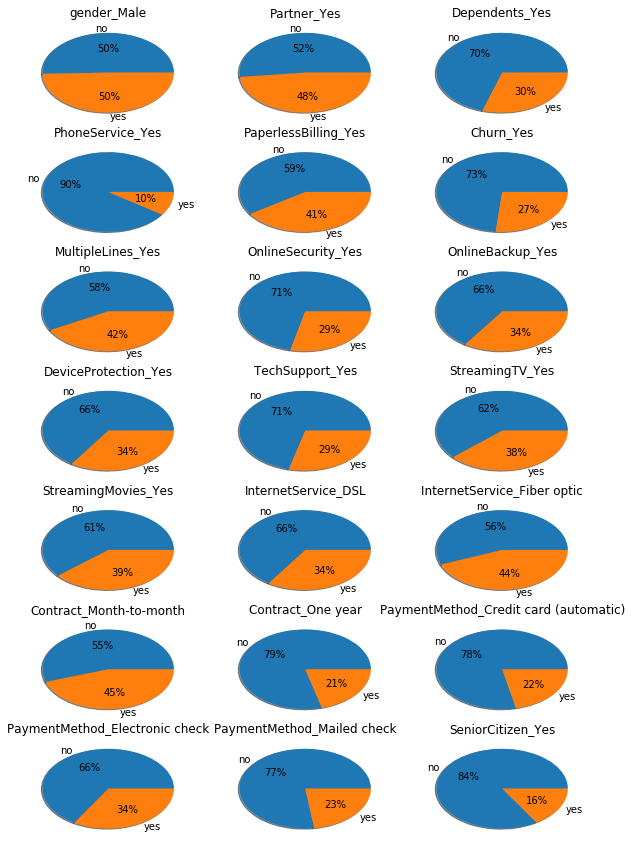

In [46]:
plt.subplots_adjust(wspace=2,hspace=2)
plt.figure(figsize=(10,15))
store = 0

for i in range(len(data.columns)-3):    
    if i == 0 | i > 4:
            size = data[data.columns[i]].value_counts()
            plt.subplot(7,3,i-4)
            plt.pie(size, labels=["no", "yes"], shadow = True, autopct='%1.0f%%')
            plt.title(data.columns[i])
            store = i
size = data["SeniorCitizen_Yes"].value_counts()
plt.subplot(7,3,store -3)
plt.pie(size, labels=["no", "yes"], shadow = True, autopct='%1.0f%%')
plt.title("SeniorCitizen_Yes")


plt.show()    

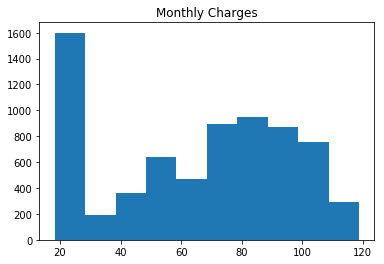

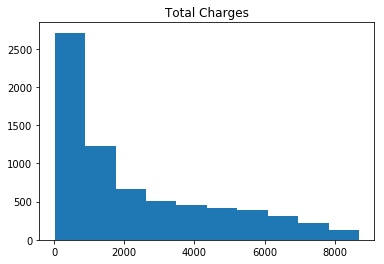

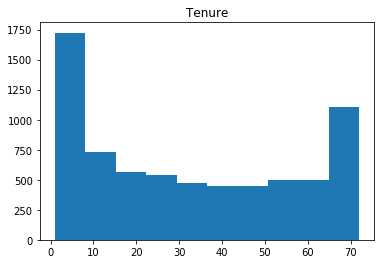

In [47]:
#fig, axs = plt.subplots(3,1)
plt.hist(data["MonthlyCharges"])
plt.title("Monthly Charges")
plt.show()
plt.hist(data["TotalCharges"])
plt.title("Total Charges")
plt.show()
plt.hist(data["tenure"])
plt.title("Tenure")
plt.show()

### Find outliers

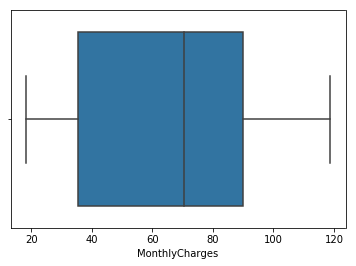

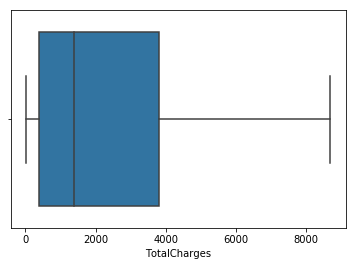

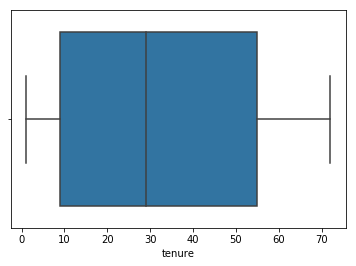

In [48]:
sns.boxplot(data["MonthlyCharges"]) 
plt.show()
sns.boxplot(data["TotalCharges"]) 
plt.show()
sns.boxplot(data["tenure"]) 
plt.show()

In [49]:
data.head()

,customerID,SeniorCitizen_Yes,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,...,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_bins,MonthlyCharges_bins,TotalCharges_bins
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,...,1,0,1,0,0,1,0,"(0, 3]","(28, 48]","(18, 100]"
1,5575-GNVDE,0,34,56.95,1889.50,1,0,0,1,0,...,1,0,0,1,0,0,1,"(20, 35]","(48, 68]","(1000, 5000]"
2,3668-QPYBK,0,2,53.85,108.15,1,0,0,1,1,...,1,0,1,0,0,0,1,"(0, 3]","(48, 68]","(100, 300]"
3,7795-CFOCW,0,45,42.30,1840.75,1,0,0,0,0,...,1,0,0,1,0,0,0,"(35, 50]","(28, 48]","(1000, 5000]"
4,9237-HQITU,0,2,70.70,151.65,0,0,0,1,1,...,0,1,1,0,0,1,0,"(0, 3]","(68, 108]","(100, 300]"


In [50]:
#total charge
Q1 = data.TotalCharges.quantile(0.25)
Q3 = data.TotalCharges.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

3393.2875000000004


In [51]:
filter_TC = data.query('(@Q1 - 1.5 * @IQR) <= TotalCharges <= (@Q3 + 1.5 * @IQR)')
print(len(filter_TC))
print(len(data))

7032
7032


In [52]:
#monthly charge
Q1 = data.MonthlyCharges.quantile(0.25)
Q3 = data.MonthlyCharges.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

54.27499999999998


In [53]:
filter_MC = filter_TC.query('(@Q1 - 1.5 * @IQR) <= MonthlyCharges <= (@Q3 + 1.5 * @IQR)')
print(len(filter_MC))
print(len(filter_TC))


7032
7032


In [54]:
#tenures
Q1 = data.tenure.quantile(0.25)
Q3 = data.tenure.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

46.0


In [55]:
data_out = filter_MC.query('(@Q1 - 1.5 * @IQR) <= tenure <= (@Q3 + 1.5 * @IQR)')
print(len(data_out))
print(len(filter_MC))


7032
7032


## Univariate Analysis after removing the outliers

### measure of location and spread

In [56]:
data_out.describe()

,SeniorCitizen_Yes,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,Churn_Yes,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.504693,0.482509,0.298493,0.903299,0.592719,0.265785,...,0.290102,0.384386,0.388367,0.343572,0.440273,0.551052,0.209329,0.216297,0.336320,0.228100
std,0.368844,24.545260,30.085974,2266.771362,0.500014,0.499729,0.457629,0.295571,0.491363,0.441782,...,0.453842,0.486484,0.487414,0.474934,0.496455,0.497422,0.406858,0.411748,0.472483,0.419637
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Measure of frequency


<Figure size 432x288 with 0 Axes>

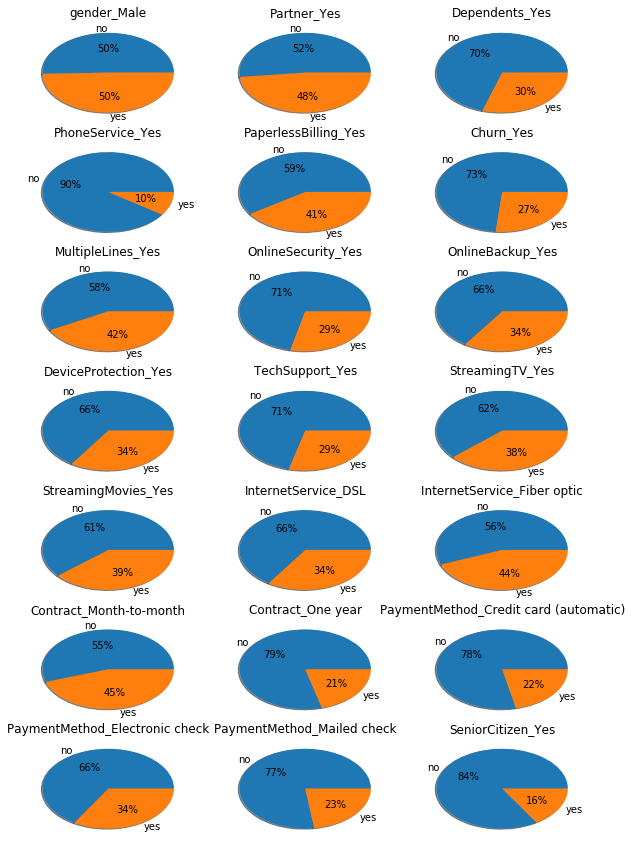

In [57]:
plt.subplots_adjust(wspace=2,hspace=2)
plt.figure(figsize=(10,15))
store = 0

for i in range(len(data_out.columns)-3):    
    if i == 0 | i > 4:
            size = data_out[data_out.columns[i]].value_counts()
            plt.subplot(7,3,i-4)
            plt.pie(size, labels=["no", "yes"], shadow = True, autopct='%1.0f%%')
            plt.title(data_out.columns[i])
            store = i
size = data_out["SeniorCitizen_Yes"].value_counts()
plt.subplot(7,3,store -3)
plt.pie(size, labels=["no", "yes"], shadow = True, autopct='%1.0f%%')
plt.title("SeniorCitizen_Yes")


plt.show()    

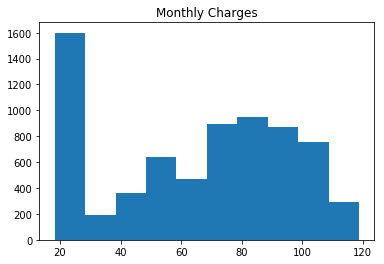

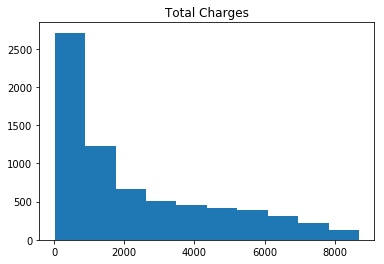

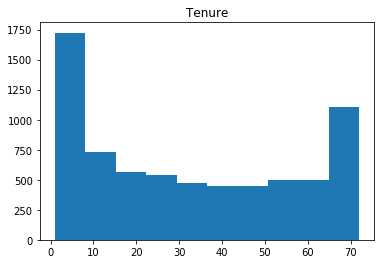

In [58]:
#fig, axs = plt.subplots(3,1)
plt.hist(data_out["MonthlyCharges"])
plt.title("Monthly Charges")
plt.show()
plt.hist(data_out["TotalCharges"])
plt.title("Total Charges")
plt.show()
plt.hist(data_out["tenure"])
plt.title("Tenure")
plt.show()

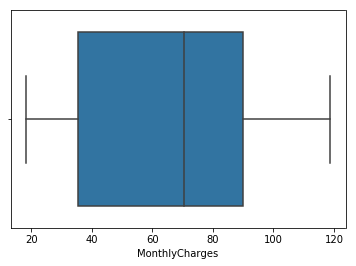

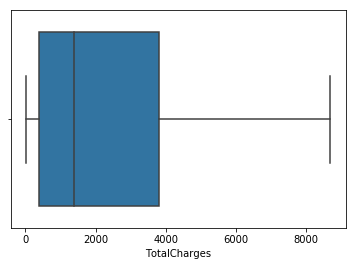

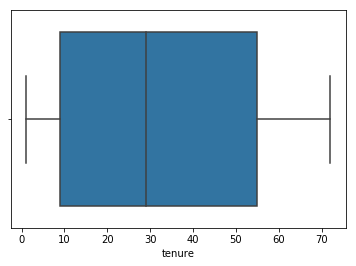

In [59]:
sns.boxplot(data_out["MonthlyCharges"]) 
plt.show()
sns.boxplot(data_out["TotalCharges"]) 
plt.show()
sns.boxplot(data_out["tenure"]) 
plt.show()

## Bivariate Analysis

In [60]:
data.columns

Index(['customerID', 'SeniorCitizen_Yes', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'PaperlessBilling_Yes', 'Churn_Yes',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure_bins', 'MonthlyCharges_bins', 'TotalCharges_bins'],
      dtype='object')

In [61]:
table = sm.stats.Table.from_data(data[["Churn_Yes", "SeniorCitizen_Yes"]])
table.table

array([[4497.,  666.],
       [1393.,  476.]])

### contingency tables + cramer's V test

In [62]:
def cramers_v(confusion_matrix):
    #confusion_matrix = pd.crosstab(x,y)
    chi2 = scipy.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [63]:
#this is pretty ugly but does the job
#also needs commenting

cont_tab_senior = pd.crosstab(index = data_out["Churn_Yes"], columns=data_out["SeniorCitizen_Yes"])
cramer_senior = cramers_v(cont_tab_senior)
print(cont_tab_senior)
print(f"cramer's V: {cramer_senior}\n")
for i in range(5,len(data_out.columns) - 3):    
    if data_out.columns[i] == "Churn_Yes":
        continue
    contingency_table = pd.crosstab(index = data_out["Churn_Yes"], columns=data_out[data_out.columns[i]])
    print(contingency_table)
    cramer = cramers_v(contingency_table)
    print(f"cramer's V: {cramer}\n")

SeniorCitizen_Yes     0    1
Churn_Yes                   
0                  4497  666
1                  1393  476
cramer's V: 0.14964076703557547

gender_Male     0     1
Churn_Yes              
0            2544  2619
1             939   930
cramer's V: 0.0

Partner_Yes     0     1
Churn_Yes              
0            2439  2724
1            1200   669
cramer's V: 0.14919449600978893

Dependents_Yes     0     1
Churn_Yes                 
0               3390  1773
1               1543   326
cramer's V: 0.16235077099642556

PhoneService_Yes    0     1
Churn_Yes                  
0                 510  4653
1                 170  1699
cramer's V: 0.0

PaperlessBilling_Yes     0     1
Churn_Yes                       
0                     2395  2768
1                      469  1400
cramer's V: 0.19076784985280437

MultipleLines_Yes     0     1
Churn_Yes                    
0                  3046  2117
1                  1019   850
cramer's V: 0.03787622892128604

OnlineSecurity_Yes   

### ANOVA - important: it assumes normalized data

In [64]:
mod = ols(formula='Churn_Yes ~ TotalCharges + MonthlyCharges + tenure', data=data_out).fit()
table = sm.stats.anova_lm(mod, typ=2) # Type 2 ANOVA DataFrame

In [65]:
#this function adds the effect size (eta sqared)
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
TotalCharges,21.488662,1.0,21.488662,141.942505,2.050726e-32,0.018057,0.017928
MonthlyCharges,99.000796,1.0,99.000796,653.945834,5.415668e-138,0.083191,0.083054
tenure,5.578363,1.0,5.578363,36.847654,1.343746e-09,0.004688,0.004560
Residual,1063.968237,7028.0,0.151390,NaN,NaN,NaN,NaN


# logistic regression


In [67]:
# Preparation of data for fitting
current_var = data_out.columns.tolist()
logistic_data =['Churn_Yes','TotalCharges', 'SeniorCitizen_Yes'] #here we have to put the variables for the regression
data_out = data_out[logistic_data]
data_out.head()


,Churn_Yes,TotalCharges,SeniorCitizen_Yes
0,0,29.85,0
1,0,1889.50,0
2,1,108.15,0
3,0,1840.75,0
4,1,151.65,0


In [68]:
# Printing names of columns for further usage
ind_var = data_out.columns[1:]
ind_var

Index(['TotalCharges', 'SeniorCitizen_Yes'], dtype='object')

In [69]:
# Fitting the regression
logit = sm.Logit(data_out["Churn_Yes"], data_out[ind_var])

In [70]:
result = logit.fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 6


/Users/enricaarchetti/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [71]:
result.summary2()

/Users/enricaarchetti/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/enricaarchetti/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/enricaarchetti/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:                 Logit             Pseudo R-squared:  inf   
Dependent Variable:    Churn_Yes         AIC:               inf   
Date:                  2018-12-19 13:21  BIC:               inf   
No. Observations:      7032              Log-Likelihood:    -inf  
Df Model:              1                 LL-Null:           0.0000
Df Residuals:          7030              LLR p-value:       1.0000
Converged:             1.0000            Scale:             1.0000
No. Iterations:        6.0000                                     
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
TotalCharges      -0.0004   0.0000 -33.0259 0.0000 -0.0005 -0.0004
SeniorCitizen_Yes  0.7737   0.0724  10.6818 0.0000  0.6317  0.9156
==================================================================

"""

/Users/enricaarchetti/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


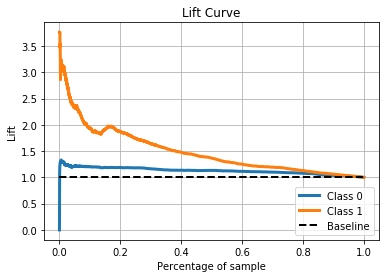

In [72]:
# Plotting evaluation statistics for the performance of the model
import scikitplot as skplt

pred = np.array([1-result.predict(), result.predict()])
#lift curve
skplt.metrics.plot_lift_curve(data_out["Churn_Yes"], pred.T)

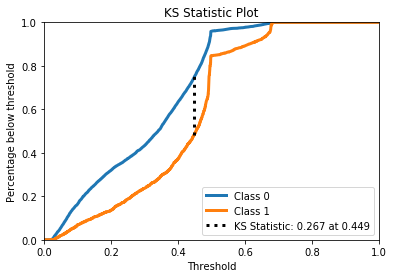

In [73]:
skplt.metrics.plot_ks_statistic(data_out['Churn_Yes'], pred.T)

/Users/enricaarchetti/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


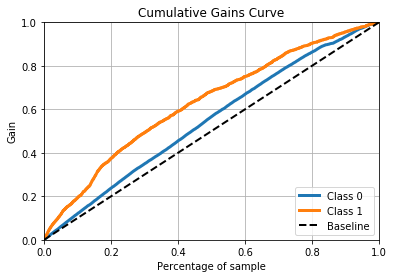

In [74]:
skplt.metrics.plot_cumulative_gain(data_out['Churn_Yes'], pred.T)

/Users/enricaarchetti/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


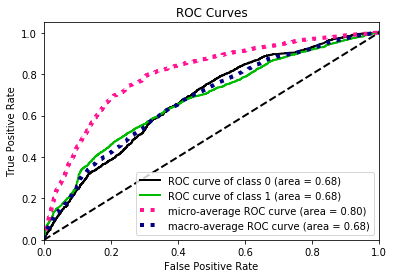

In [75]:
skplt.metrics.plot_roc_curve(data_out['Churn_Yes'], pred.T)

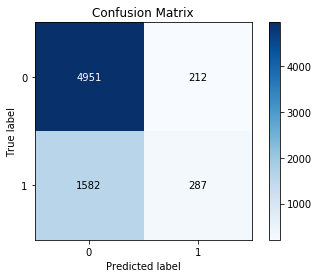

In [76]:
skplt.metrics.plot_confusion_matrix(data_out['Churn_Yes'], result.predict() > 0.5) 
#not really sure we have to use 0.5 but I can't understand what's the base for that number